In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import mne
import numpy as np
import mat73
from mne_connectivity.viz import plot_connectivity_circle

import scipy.io
import numpy as np
import h5py as h5

import seaborn as sns

import mat73 

from scipy.signal import hilbert
import pandas as pd
from scipy.stats import zscore
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from fooof.plts.spectra import plot_spectrum
from fooof import FOOOF
from fooof.sim.gen import gen_aperiodic

import pickle # For reading dictionaries from .pkl

from scipy.stats import pearsonr

import networkx as nx

from scipy.stats import kruskal
from statsmodels.stats.multitest import fdrcorrection

/var/folders/jd/3zpnmlfd2232jh4tlx7lspb40000gn/T/ipykernel_43456/987461041.py:23: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof.plts.spectra import plot_spectrum


In [2]:
cd

/Users/dmytro


In [3]:
cd Documents/Projects/PROJECT_main/multiclass_meg_features_analysis/

/Users/dmytro/Documents/Projects/PROJECT_main/multiclass_meg_features_analysis


In [4]:
from libs import neurofeat

In [4]:
# List of ROIs from the AAL atlas
ROI_AAL_list = [ 'Rectus_L','Olfactory_L','Frontal_Sup_Orb_L','Frontal_Med_Orb_L','Frontal_Mid_Orb_L',
                'Frontal_Inf_Orb_L','Frontal_Sup_L','Frontal_Mid_L','Frontal_Inf_Oper_L','Frontal_Inf_Tri_L',
                'Frontal_Sup_Medial_L','Supp_Motor_Area_L','Paracentral_Lobule_L','Precentral_L','Rolandic_Oper_L',
                'Postcentral_L','Parietal_Sup_L','Parietal_Inf_L','SupraMarginal_L','Angular_L','Precuneus_L',
                'Occipital_Sup_L','Occipital_Mid_L','Occipital_Inf_L','Calcarine_L','Cuneus_L','Lingual_L',
                'Fusiform_L','Heschl_L','Temporal_Sup_L','Temporal_Mid_L','Temporal_Inf_L','Temporal_Pole_Sup_L',
                'Temporal_Pole_Mid_L','ParaHippocampal_L','Cingulum_Ant_L','Cingulum_Mid_L','Cingulum_Post_L',
                'Insula_L','Rectus_R','Olfactory_R','Frontal_Sup_Orb_R','Frontal_Med_Orb_R','Frontal_Mid_Orb_R',
                'Frontal_Inf_Orb_R','Frontal_Sup_R','Frontal_Mid_R','Frontal_Inf_Oper_R','Frontal_Inf_Tri_R',
                'Frontal_Sup_Medial_R','Supp_Motor_Area_R','Paracentral_Lobule_R','Precentral_R','Rolandic_Oper_R',
                'Postcentral_R','Parietal_Sup_R','Parietal_Inf_R', 'SupraMarginal_R','Angular_R','Precuneus_R',
                'Occipital_Sup_R','Occipital_Mid_R','Occipital_Inf_R','Calcarine_R','Cuneus_R','Lingual_R',
                'Fusiform_R','Heschl_R','Temporal_Sup_R','Temporal_Mid_R','Temporal_Inf_R','Temporal_Pole_Sup_R',
                'Temporal_Pole_Mid_R','ParaHippocampal_R','Cingulum_Ant_R','Cingulum_Mid_R','Cingulum_Post_R',
                'Insula_R','Hippocampus_L','Hippocampus_R','Amygdala_L','Amygdala_R','Caudate_L','Caudate_R',
                'Putamen_L','Putamen_R','Pallidum_L','Pallidum_R','Thalamus_L','Thalamus_R','Cerebelum_Crus1_L',
                'Cerebelum_Crus1_R','Cerebelum_Crus2_L','Cerebelum_Crus2_R','Cerebelum_3_L','Cerebelum_3_R',
                'Cerebelum_4_5_L','Cerebelum_4_5_R','Cerebelum_6_L','Cerebelum_6_R','Cerebelum_7b_L','Cerebelum_7b_R',
                'Cerebelum_8_L','Cerebelum_8_R','Cerebelum_9_L','Cerebelum_9_R','Cerebelum_10_L','Cerebelum_10_R',
                'Vermis_1_2','Vermis_3','Vermis_4_5','Vermis_6','Vermis_7','Vermis_8','Vermis_9','Vermis_10']
ROIs = '%0d'.join ( ROI_AAL_list )

# For each ROI, it attributes one lobe
Region_AAL = [ 'LF','LF','LF','LF','LF','LF','LF','LF','LF','LF','LF','LF','LF','LF','LF','LP','LP','LP','LP','LP',
              'LP','LO','LO','LO','LO','LO','LO','LO','LT','LT','LT','LT','LT','LT','LT','LF','LP','LP','LT','RF',
              'RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RF','RP','RP','RP','RP','RP','RP',
              'RO','RO','RO','RO','RO','RO','RO','RT','RT','RT','RT','RT','RT','RT','RF','RP','RP','RT','LT','RT',
              'NB','NB','NB','NB','NB','NB','NB','NB','NB','NB','Cer','Cer','Cer','Cer','Cer','Cer','Cer','Cer',
              'Cer','Cer','Cer','Cer','Cer','Cer','Cer','Cer','Cer','Cer','Cer','Cer','Cer','Cer','Cer','Cer',
              'Cer','Cer' ] # partition provided by PS

In [5]:
from nilearn import datasets

aal = datasets.fetch_atlas_aal()

In [6]:
len(aal["labels"])

116

In [7]:
set(ROI_AAL_list) == set(aal["labels"])

True

In [8]:
indices_aal = [ROI_AAL_list.index(item) for item in aal["labels"]]

In [9]:
from nilearn import plotting

coordinates = plotting.find_parcellation_cut_coords(labels_img=aal["maps"])

In [10]:
len(coordinates) # coordinates of AAL atlas regions

116

In [11]:
# Load average feature importances estimated from XGB
avg_imp_aec_plv = pd.read_csv("data/average_importance_xgb/avg_imp_aec_plv.csv", index_col=0)
avg_imp_aec_plv_atm = pd.read_csv("data/average_importance_xgb/avg_imp_aec_plv_atm.csv", index_col=0)

ver_8apr_overlap = pd.read_csv("data/average_importance_xgb/overlap_feats_atm-aec-plv.csv", index_col=0)

In [12]:
avg_imp_aec_plv.shape, avg_imp_aec_plv_atm.shape, ver_8apr_overlap.shape

((14, 1), (10, 1), (9, 1))

In [13]:
avg_imp_aec_plv_atm.index

Int64Index([1112, 4554, 5175, 2565, 5254, 4552, 2561, 645, 2563, 1182], dtype='int64')

In [14]:
ver_8apr_overlap.index

Index(['12-83', '26-64', '7-46', '26-62', '53-55', '26-66', '52-76', '46-55',
       '12-13'],
      dtype='object')

In [15]:
ver_8apr_overlap.index = [1182, 2563, 645, 2561, 5254, 2565, 5175, 4554, 1112]

In [16]:
# Find row and column indeces for the most important edges (2 regions)

matr_zer = np.zeros((116, 116))

for index, value in ver_8apr_overlap.iterrows():
    row, col = divmod(index, 100)
    print(f'row: {row}, id: {col}')
    matr_zer[row, col] = value.values[0]

row: 11, id: 82
row: 25, id: 63
row: 6, id: 45
row: 25, id: 61
row: 52, id: 54
row: 25, id: 65
row: 51, id: 75
row: 45, id: 54
row: 11, id: 12


In [18]:
matr_zer.shape

(116, 116)

In [18]:
matr_zer.nonzero()

(array([ 6, 11, 11, 25, 25, 25, 45, 51, 52]),
 array([45, 12, 82, 61, 63, 65, 54, 75, 54]))

In [19]:
matr_zer

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
# Save a sparse matrix to .mat file 

from scipy.io import savemat

savemat(file_name="sparse_matrix.mat", mdict={"data": matr_zer})

In [19]:
# regions of AAL from library and our - are in different order so we should reorder them
matr_zer = matr_zer[indices_aal, :][:, indices_aal]

In [20]:
matr_zer.nonzero()

(array([ 1,  2,  3, 18, 18, 44, 44, 44, 69]),
 array([57,  3, 57, 68, 70, 43, 47, 51, 33]))

In [21]:
np.unique(np.array(np.nonzero(matr_zer)).flatten())

array([ 1,  2,  3, 18, 33, 43, 44, 47, 51, 57, 68, 69, 70])

In [22]:
# find coordinates of specified regions
coordinates[[ 1,  2,  3, 18, 33, 43, 44, 47, 51, 57, 68, 69, 70], :]

array([[ 41.10085773,  -9.54983733,  50.80981958],
       [-18.79777159,  33.4178273 ,  40.99442897],
       [ 21.60483473,  29.9097188 ,  42.51307351],
       [ -6.80973451,   3.12942478,  60.53539823],
       [  7.66409442, -10.19700409,  38.43758511],
       [ 15.70983342, -74.44922085,   8.01934444],
       [ -8.39831224, -80.54345992,  26.1721519 ],
       [ 16.0773913 , -68.14173913,  -5.21565217],
       [ 37.10644391, -81.00143198,  18.09546539],
       [ 41.15825268, -26.7726916 ,  51.25398901],
       [ -8.32018561, -26.78731632,  69.02088167],
       [  7.12679426, -32.94258373,  66.79186603],
       [-11.76715177,   9.72349272,   8.07068607]])

In [23]:
symmetric_matrix = matr_zer + matr_zer.T # make a symmetric matrix to have undirected links

In [24]:
ver_8apr_overlap

,0
1182,0.029123
2563,0.031806
645,0.032993
2561,0.037611
5254,0.046138
2565,0.059834
5175,0.070632
4554,0.094402
1112,0.111831


In [25]:
np.where((symmetric_matrix > 0.027) & (symmetric_matrix < 0.0292))

(array([18, 70]), array([70, 18]))

In [26]:
symmetric_matrix[[18,70],:][:,[18,70]]

array([[0.        , 0.02912272],
       [0.02912272, 0.        ]])

In [27]:
matr_zer.nonzero()

(array([ 1,  2,  3, 18, 18, 44, 44, 44, 69]),
 array([57,  3, 57, 68, 70, 43, 47, 51, 33]))

In [28]:
idx_nonzer = [1,  2,  3, 18, 33, 43, 44, 47, 51, 57, 68, 69, 70]
 
plotting.plot_connectome(
    #matr_zer[indices_aal, :][:, indices_aal],
    #symmetric_matrix,
    symmetric_matrix[idx_nonzer,:][:,idx_nonzer],
    coordinates[idx_nonzer, :],
    #edge_threshold="20%", # 0.9 or "15%"
    #title="Avg importance of overlapping features",
    title=None,
    node_size=15,
    black_bg=False,
    alpha=0.5,
    output_file='figures/avg_importance.png',
);

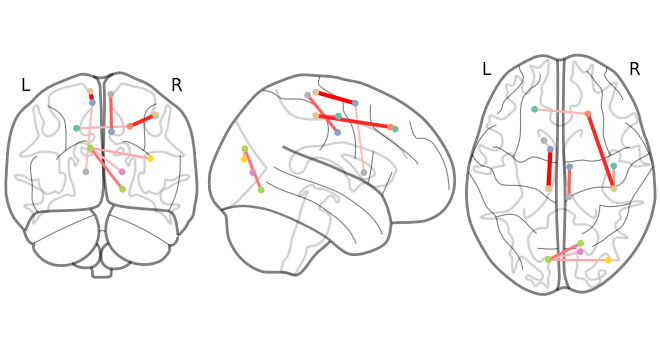

In [29]:
from IPython.display import Image
Image("figures/avg_importance.png")

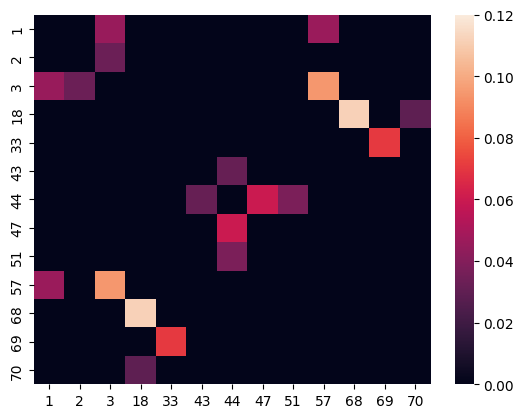

In [61]:
sns.heatmap(data=symmetric_matrix[idx_nonzer, :][:, idx_nonzer], vmin=0.0, vmax=0.12,
           xticklabels=idx_nonzer, yticklabels=idx_nonzer);

In [1]:
from scipy.io import loadmat

In [4]:
arr = loadmat("../sparse_matrix.mat")['data']

In [5]:
arr.nonzero()

(array([ 6, 11, 11, 25, 25, 25, 45, 51, 52]),
 array([45, 12, 82, 61, 63, 65, 54, 75, 54]))

In [6]:
arr[6, 45]

0.03299309

In [7]:
arr[11, 12]

0.11183101

In [8]:
from scipy.linalg import issymmetric

issymmetric(arr)

False

In [10]:
issymmetric(arr + arr.T)

True

In [11]:
symm = arr + arr.T

In [13]:
from scipy.io import savemat

savemat(file_name="symm_sparse_matrix.mat", mdict={"data": symm})